<a href="https://colab.research.google.com/github/sauryanshu55/CryptoPlay-ETF/blob/main/Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [21]:
# Function to fetch data
def fetch_data(tickers, start, end):
    data = yf.download(tickers, start=start, end=end)["Adj Close"]
    return data

In [22]:
# Define the tickers and date range
equities_ticker = "ESPO"
crypto_tickers = ["BTC-USD", "ETH-USD"]
start_date = "2020-12-15"
end_date = "2024-12-15"

In [23]:
# Fetch data for equities and cryptocurrencies
equities_data = fetch_data(equities_ticker, start_date, end_date)
crypto_data = fetch_data(crypto_tickers, start_date, end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  2 of 2 completed


In [24]:
# Calculate quarterly returns
equities_returns = equities_data.resample('Q').ffill().pct_change()
crypto_returns = crypto_data.resample('Q').ffill().pct_change()


<ipython-input-24-37ba7b5a0e88>:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  equities_returns = equities_data.resample('Q').ffill().pct_change()
<ipython-input-24-37ba7b5a0e88>:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  crypto_returns = crypto_data.resample('Q').ffill().pct_change()


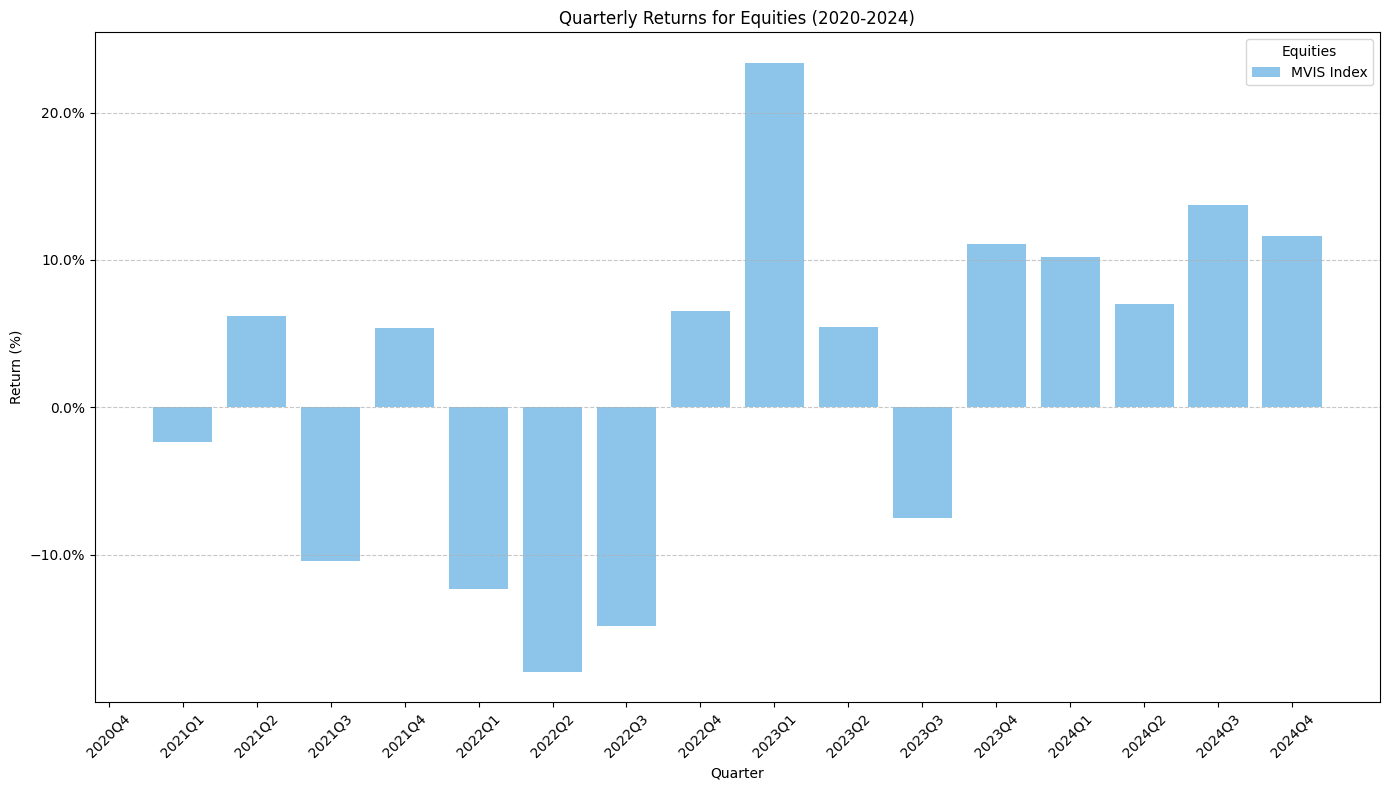

In [25]:
# Bar chart for equities
equities_returns_plot = equities_returns.reset_index()
equities_returns_plot['Quarter'] = equities_returns_plot['Date'].dt.to_period('Q')
plt.figure(figsize=(14, 8))

plt.bar(
    equities_returns_plot['Quarter'].astype(str),
    equities_returns.iloc[:, 0],
    alpha=0.7,
    label="MVIS Index",
    color='#5DADE2'
)

plt.title("Quarterly Returns for Equities (2020-2024)")
plt.xlabel("Quarter")
plt.ylabel("Return (%)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=45)
plt.legend(title="Equities")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

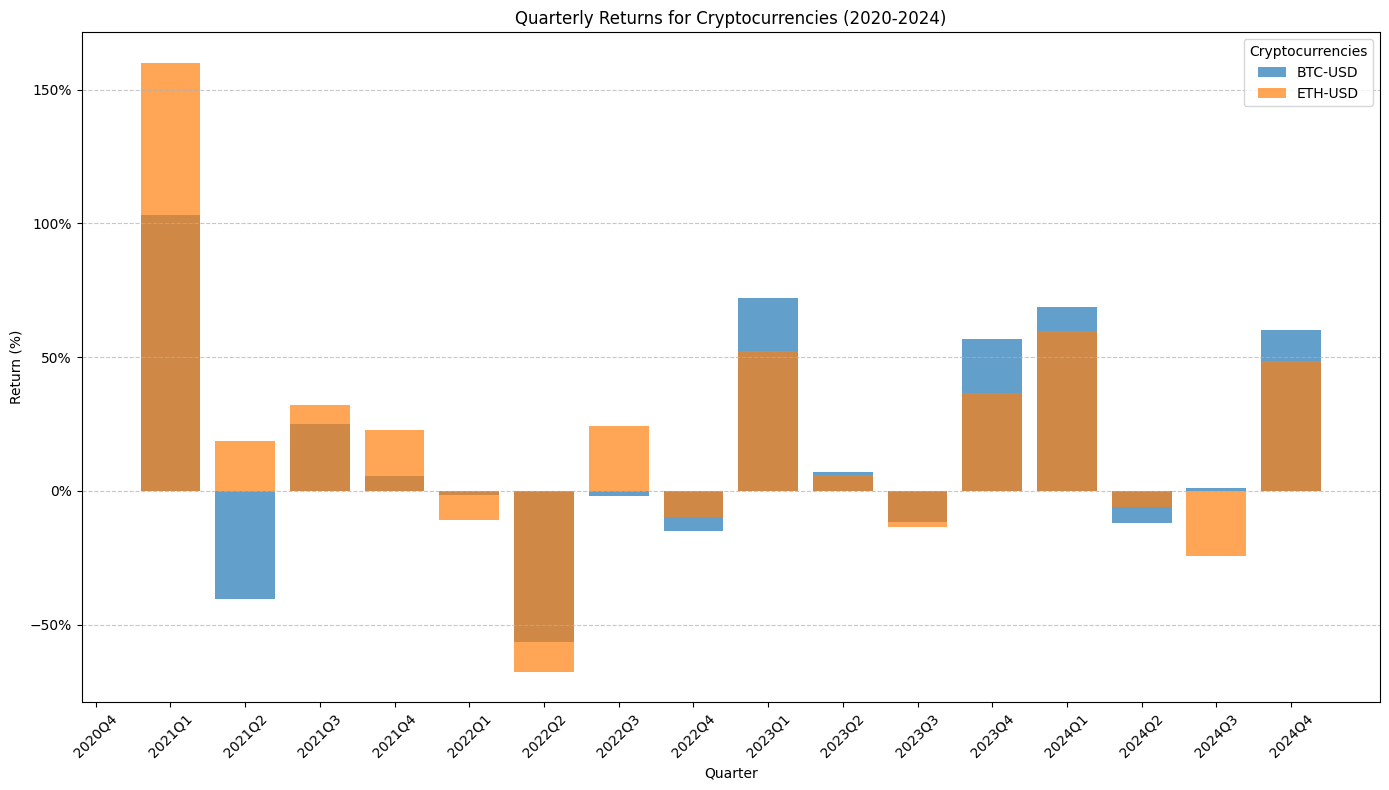

In [26]:
# Bar chart for cryptocurrencies
crypto_returns_plot = crypto_returns.reset_index()
crypto_returns_plot['Quarter'] = crypto_returns_plot['Date'].dt.to_period('Q')

plt.figure(figsize=(14, 8))
for ticker in crypto_returns.columns:
    plt.bar(
        crypto_returns_plot['Quarter'].astype(str),
        crypto_returns[ticker],
        alpha=0.7,
        label=ticker
    )

plt.title("Quarterly Returns for Cryptocurrencies (2020-2024)")
plt.xlabel("Quarter")
plt.ylabel("Return (%)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=45)
plt.legend(title="Cryptocurrencies")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()